- **Decision Tree**
<img src="https://cdn.sanity.io/images/oaglaatp/production/630b5c5bc54b70b4e974d0955d44b3cb75b9403d-3720x2160.png?w=3720&h=2160&auto=format">

Entropy : Entropy tell us us how pure the group is

Information Gain: Information gain tells us how much impurity is reduced when we split the dataset  using  feature

    IG : original entropy and weighted average 

    IF = Entropy - WA 

Contribution: Entropy * Weight

Weighted Entropy : is the sum of all the contributions



**Tree Structure**

- Node : A point in the tree where the decision is made.

- Root Node : This is the top most node

- Internal Node: Node with childrens

- Leaf Node : Final Prediction Node.




**Model Behaviour**

- Greedy Algorithm
- Recursive Partitioning
- Stopping criteria


**Regularization**
- Pre- Pruning
- Post - Pruning
- Cost Complexity Pruning


**Example on Decision Tree**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_default_industry.csv')

In [3]:
df.head()

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
0,25,200000.0,Contract,Tier-3,Graduate,Married,281280.667318,60,14.429230,768.0,6447.685358,6607.670383,0.386861,1.406403,0
1,55,NaN,Self-Employed,Tier-1,12th,Married,287920.711322,48,12.779348,632.0,9093.694365,7692.697294,0.545622,1.439604,0
2,50,200000.0,Salaried,Tier-1,Graduate,Single,399631.681027,72,11.692436,754.0,9055.655375,7749.106267,0.543339,1.998158,1
3,40,200000.0,Self-Employed,Tier-1,Graduate,Single,654321.638239,60,17.508472,628.0,16268.348836,16441.006415,0.976101,3.271608,0
4,40,200000.0,Salaried,Tier-3,Postgraduate,Divorced,361899.398930,12,13.613364,730.0,22851.471551,32428.103968,1.371088,1.809497,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50000 non-null  int64  
 1   annual_income     49028 non-null  float64
 2   employment_type   49547 non-null  object 
 3   city_tier         49476 non-null  object 
 4   education         50000 non-null  object 
 5   marital_status    50000 non-null  object 
 6   loan_amount       50000 non-null  float64
 7   loan_term_months  50000 non-null  int64  
 8   interest_rate     50000 non-null  float64
 9   credit_score      49257 non-null  float64
 10  existing_emis     50000 non-null  float64
 11  estimated_emi     50000 non-null  float64
 12  dti               50000 non-null  float64
 13  loan_to_income    50000 non-null  float64
 14  default           50000 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 5.7+ MB


In [5]:
df.isna().sum()

age                   0
annual_income       972
employment_type     453
city_tier           524
education             0
marital_status        0
loan_amount           0
loan_term_months      0
interest_rate         0
credit_score        743
existing_emis         0
estimated_emi         0
dti                   0
loan_to_income        0
default               0
dtype: int64

In [6]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [7]:
cat_cols

Index(['employment_type', 'city_tier', 'education', 'marital_status'], dtype='object')

In [8]:
df[num_cols].isna().sum()

age                   0
annual_income       972
loan_amount           0
loan_term_months      0
interest_rate         0
credit_score        743
existing_emis         0
estimated_emi         0
dti                   0
loan_to_income        0
default               0
dtype: int64

<Axes: xlabel='annual_income', ylabel='Density'>

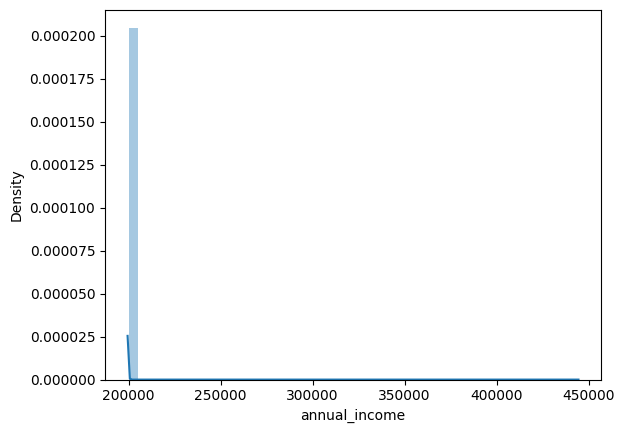

In [9]:
sns.distplot(df['annual_income'])

In [10]:
df['annual_income'].skew()

np.float64(111.39261360810083)

<Axes: xlabel='credit_score', ylabel='Density'>

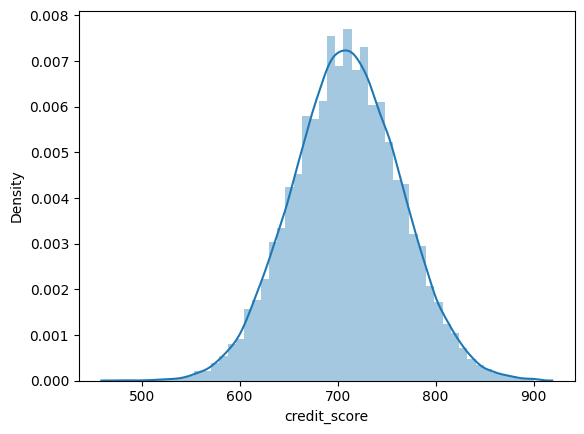

In [11]:
sns.distplot(df['credit_score'])

In [12]:
df['credit_score'].mean()

np.float64(709.34963558479)

In [13]:
df['credit_score'].median()

709.0

In [14]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [15]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())

In [16]:
df.isna().sum()

age                   0
annual_income         0
employment_type     453
city_tier           524
education             0
marital_status        0
loan_amount           0
loan_term_months      0
interest_rate         0
credit_score          0
existing_emis         0
estimated_emi         0
dti                   0
loan_to_income        0
default               0
dtype: int64

In [17]:
df[df['employment_type'].isna()==True]

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
310,50,200000.0,NaN,Tier-1,Postgraduate,Single,499718.978111,36,16.009657,881.0,0.000000,17571.019109,0.000000,2.498595,1
343,44,200000.0,NaN,Tier-2,10th,Married,351979.757655,48,13.755199,760.0,19085.517329,9575.199436,1.145131,1.759899,1
444,43,200000.0,NaN,Tier-1,Graduate,Single,684630.282049,36,11.970194,709.0,25465.535000,22729.777299,1.527932,3.423151,0
689,56,200000.0,NaN,Tier-2,10th,Single,330020.848552,60,21.247630,660.0,3394.421985,8974.205570,0.203665,1.650104,0
724,56,200000.0,NaN,Tier-1,Postgraduate,Single,397055.677023,48,13.965683,722.0,11044.126081,10843.298742,0.662648,1.985278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,39,200000.0,NaN,Tier-2,Graduate,Single,416794.578376,24,11.563740,701.0,16052.759198,19535.161960,0.963166,2.083973,1
49698,37,200000.0,NaN,Tier-3,Graduate,Married,414113.153049,60,14.005466,764.0,13251.073398,9636.862322,0.795064,2.070566,0
49703,43,200000.0,NaN,Tier-3,Graduate,Married,312329.058279,60,13.673277,768.0,4031.033511,7214.555459,0.241862,1.561645,0
49719,31,200000.0,NaN,Tier-3,Postgraduate,Married,50000.000000,48,16.642098,691.0,17125.593461,1433.510467,1.027536,0.250000,0


In [18]:
df['city_tier'].mode()[0]

'Tier-2'

In [19]:
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode()[0])

In [20]:
df['city_tier'] = df['city_tier'].fillna(df['city_tier'].mode()[0])

In [21]:
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
l = df.columns

In [23]:
l

Index(['age', 'annual_income', 'employment_type', 'city_tier', 'education',
       'marital_status', 'loan_amount', 'loan_term_months', 'interest_rate',
       'credit_score', 'existing_emis', 'estimated_emi', 'dti',
       'loan_to_income', 'default'],
      dtype='object')

In [24]:
type(l)
# list(l)

pandas.core.indexes.base.Index

In [25]:
df['loan_amount'].describe()

count    5.000000e+04
mean     4.619579e+05
std      2.512965e+05
min      5.000000e+04
25%      2.830749e+05
50%      4.518680e+05
75%      6.225535e+05
max      3.887174e+06
Name: loan_amount, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50000 non-null  int64  
 1   annual_income     50000 non-null  float64
 2   employment_type   50000 non-null  object 
 3   city_tier         50000 non-null  object 
 4   education         50000 non-null  object 
 5   marital_status    50000 non-null  object 
 6   loan_amount       50000 non-null  float64
 7   loan_term_months  50000 non-null  int64  
 8   interest_rate     50000 non-null  float64
 9   credit_score      50000 non-null  float64
 10  existing_emis     50000 non-null  float64
 11  estimated_emi     50000 non-null  float64
 12  dti               50000 non-null  float64
 13  loan_to_income    50000 non-null  float64
 14  default           50000 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 5.7+ MB


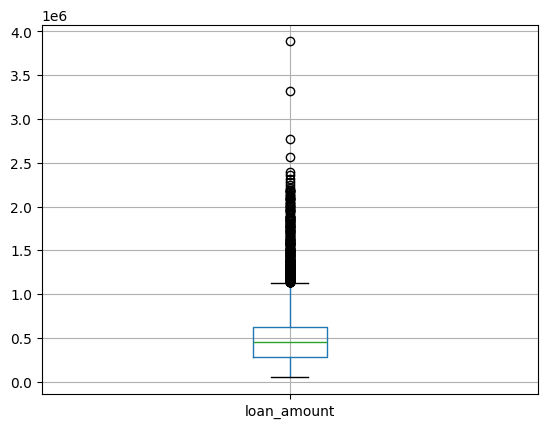

In [27]:
df.boxplot(column='loan_amount')
plt.show()

In [28]:
upper_cap = df['loan_amount'].quantile(0.98)

In [29]:
upper_cap # > 989777

np.float64(989977.4758808134)

In [30]:
upper_loan_amt_df = df[df['loan_amount'] > 989977.47]

In [31]:
upper_loan_amt_df

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
77,31,200000.0,Salaried,Tier-3,Graduate,Single,1.992811e+06,48,11.388939,699.0,3958.580086,19068.686831,0.237515,9.964054,0
93,38,200000.0,Salaried,Tier-3,Graduate,Single,1.340660e+06,48,13.153288,655.0,14817.491465,13054.521271,0.889049,6.703300,0
97,51,200000.0,Self-Employed,Tier-3,Graduate,Married,1.208280e+06,48,12.784755,773.0,1415.156211,32286.197174,0.084909,6.041401,1
143,39,200000.0,Salaried,Tier-2,Postgraduate,Single,1.160886e+06,24,15.788908,793.0,24186.614347,56723.586018,1.451197,5.804432,0
225,34,200000.0,Salaried,Tier-2,Graduate,Married,1.035083e+06,72,12.153324,700.0,27703.510694,20318.696969,1.662211,5.175415,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49552,37,200000.0,Self-Employed,Tier-2,Graduate,Divorced,1.031662e+06,48,10.888656,720.0,37143.072817,26608.099903,2.228584,5.158311,1
49571,55,200000.0,Salaried,Tier-1,12th,Married,2.178333e+06,24,11.044472,693.0,12026.788980,33966.244902,0.721607,10.891667,0
49574,28,200000.0,Salaried,Tier-1,10th,Single,1.012384e+06,48,12.721707,629.0,20763.450790,27020.111667,1.245807,5.061922,1
49761,38,200000.0,Salaried,Tier-2,12th,Married,1.040658e+06,12,17.368332,808.0,18883.400383,95094.943855,1.133004,5.203289,1


In [32]:
1000/50000

0.02

In [33]:
df['loan_amount'] = df['loan_amount'].clip(upper=upper_cap)

In [34]:
# df

In [35]:
df['default'].value_counts()

default
0    37029
1    12971
Name: count, dtype: int64

In [36]:
df.head()

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
0,25,200000.0,Contract,Tier-3,Graduate,Married,281280.667318,60,14.429230,768.0,6447.685358,6607.670383,0.386861,1.406403,0
1,55,200000.0,Self-Employed,Tier-1,12th,Married,287920.711322,48,12.779348,632.0,9093.694365,7692.697294,0.545622,1.439604,0
2,50,200000.0,Salaried,Tier-1,Graduate,Single,399631.681027,72,11.692436,754.0,9055.655375,7749.106267,0.543339,1.998158,1
3,40,200000.0,Self-Employed,Tier-1,Graduate,Single,654321.638239,60,17.508472,628.0,16268.348836,16441.006415,0.976101,3.271608,0
4,40,200000.0,Salaried,Tier-3,Postgraduate,Divorced,361899.398930,12,13.613364,730.0,22851.471551,32428.103968,1.371088,1.809497,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50000 non-null  int64  
 1   annual_income     50000 non-null  float64
 2   employment_type   50000 non-null  object 
 3   city_tier         50000 non-null  object 
 4   education         50000 non-null  object 
 5   marital_status    50000 non-null  object 
 6   loan_amount       50000 non-null  float64
 7   loan_term_months  50000 non-null  int64  
 8   interest_rate     50000 non-null  float64
 9   credit_score      50000 non-null  float64
 10  existing_emis     50000 non-null  float64
 11  estimated_emi     50000 non-null  float64
 12  dti               50000 non-null  float64
 13  loan_to_income    50000 non-null  float64
 14  default           50000 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 5.7+ MB


In [38]:
for col in num_cols:
    print(col,"Skewness is",df[col].skew())
    # print("-----")

age Skewness is 0.0021701164102427262
annual_income Skewness is 112.49150832724486
loan_amount Skewness is 0.175570470526904
loan_term_months Skewness is -0.018463479966342098
interest_rate Skewness is 0.11296265967960728
credit_score Skewness is 0.01487876409210758
existing_emis Skewness is 0.3731913180426451
estimated_emi Skewness is 2.0633059620946246
dti Skewness is 0.36977554137818175
loan_to_income Skewness is 0.7395065772087265
default Skewness is 1.0977787712167557


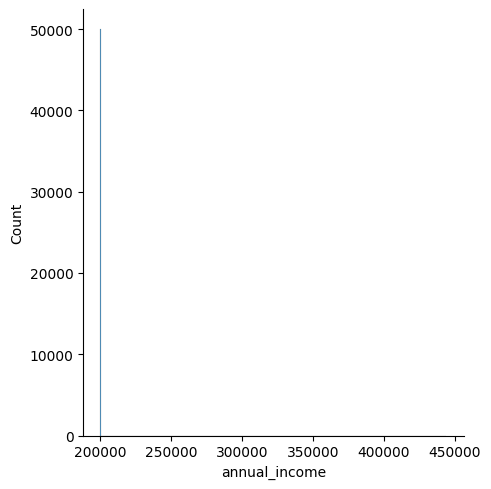

In [39]:
sns.displot(df['annual_income'])

**Technique to Handle skewness**


1. Log Transformation
2. Square Root transformation
3. Box-Cox Technique
4. Yeo-Johnson Technique

In [40]:
df[num_cols].skew().sort_values(ascending=False)

annual_income       112.491508
estimated_emi         2.063306
default               1.097779
loan_to_income        0.739507
existing_emis         0.373191
dti                   0.369776
loan_amount           0.175570
interest_rate         0.112963
credit_score          0.014879
age                   0.002170
loan_term_months     -0.018463
dtype: float64

# to handle positive skewed data : 


it computes the natural log of (1+x)

In [42]:
arr = np.array([0,10,100,1000,10000])

In [43]:
arr

array([    0,    10,   100,  1000, 10000])

advantages of using log1p for skewness (positive)

- Compress larger values
- Preserve orders
- Reduces skewness
- Makes distribution more balanced

In [44]:
np.sqrt(121)

np.float64(11.0)

In [45]:
np.log1p(arr)

array([0.        , 2.39789527, 4.61512052, 6.90875478, 9.21044037])

In [46]:
np.log1p(df['annual_income']).skew()

np.float64(92.73272603735798)

<Axes: xlabel='estimated_emi', ylabel='Density'>

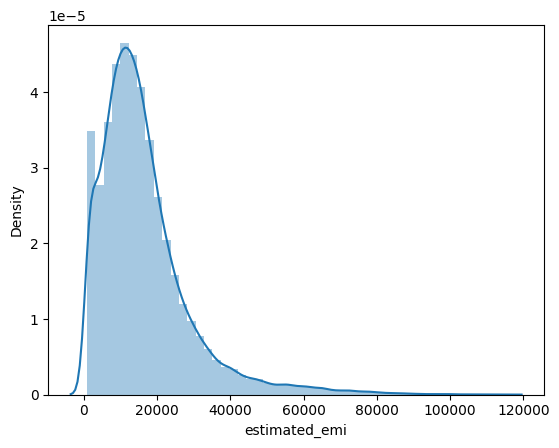

In [47]:
sns.distplot(df['estimated_emi'])

In [48]:
df['estimated_emi'] = np.sqrt(df['estimated_emi'])

<Axes: xlabel='estimated_emi', ylabel='Density'>

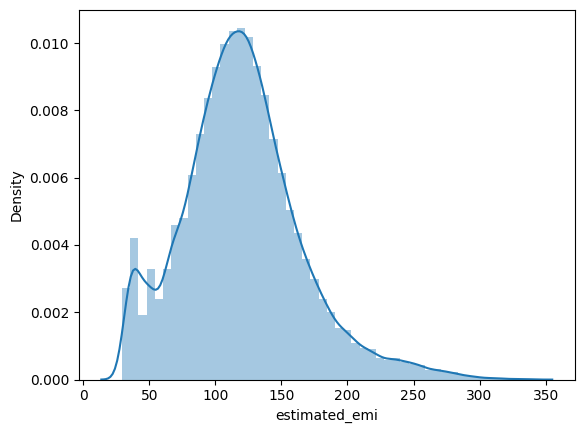

In [49]:
sns.distplot(df['estimated_emi'])

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
pt = PowerTransformer(method='yeo-johnson')

In [52]:
arr = pt.fit_transform(df[['loan_term_months']])

In [53]:
df['dummy'] = arr

In [54]:
df['dummy'].skew()

np.float64(-0.12236357095124475)

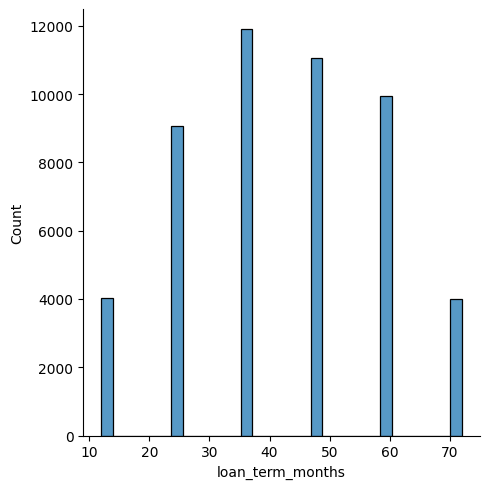

In [55]:
sns.displot(df['loan_term_months'])

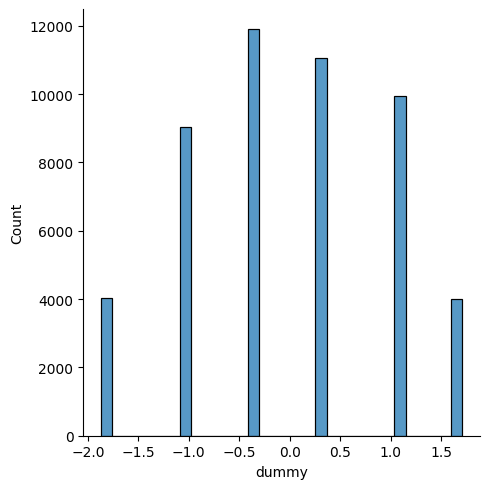

In [56]:
sns.displot(df['dummy'])

In [57]:
df.drop('dummy',axis=1,inplace=True)

In [58]:
df.head()

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
0,25,200000.0,Contract,Tier-3,Graduate,Married,281280.667318,60,14.429230,768.0,6447.685358,81.287578,0.386861,1.406403,0
1,55,200000.0,Self-Employed,Tier-1,12th,Married,287920.711322,48,12.779348,632.0,9093.694365,87.708023,0.545622,1.439604,0
2,50,200000.0,Salaried,Tier-1,Graduate,Single,399631.681027,72,11.692436,754.0,9055.655375,88.029008,0.543339,1.998158,1
3,40,200000.0,Self-Employed,Tier-1,Graduate,Single,654321.638239,60,17.508472,628.0,16268.348836,128.222488,0.976101,3.271608,0
4,40,200000.0,Salaried,Tier-3,Postgraduate,Divorced,361899.398930,12,13.613364,730.0,22851.471551,180.078050,1.371088,1.809497,0


1. load data
2. EDA (cleaning, handling null values)
3. Handling Skewness.
4. Visuals

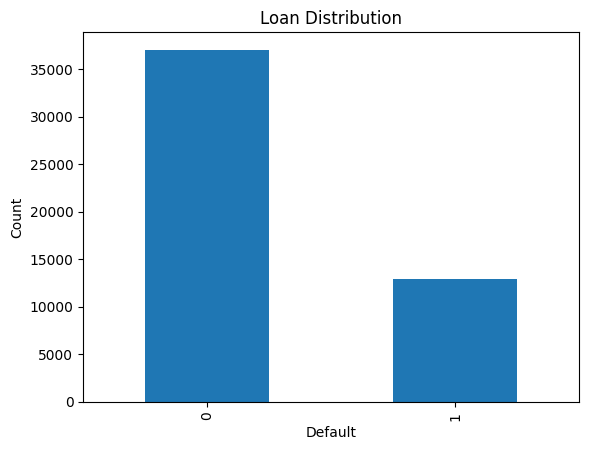

In [59]:
df['default'].value_counts().plot(kind='bar')
plt.title('Loan Distribution')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

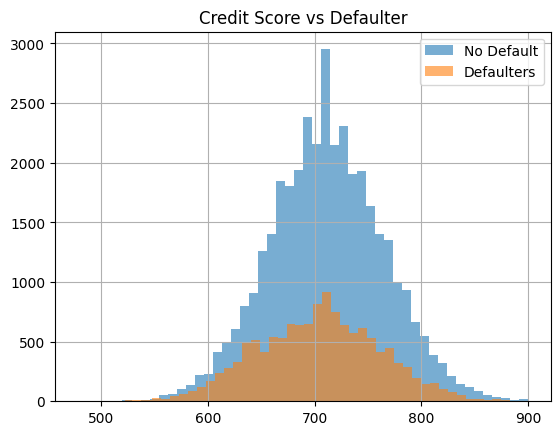

In [60]:
df[df.default == 0]['credit_score'].hist(alpha=0.6,bins=50,label='No Default')
df[df.default == 1]['credit_score'].hist(alpha=0.6,bins=50,label='Defaulters')
plt.legend()
plt.title("Credit Score vs Defaulter")
plt.show()

In [61]:
# DTI VS DEFAULT

df.columns

Index(['age', 'annual_income', 'employment_type', 'city_tier', 'education',
       'marital_status', 'loan_amount', 'loan_term_months', 'interest_rate',
       'credit_score', 'existing_emis', 'estimated_emi', 'dti',
       'loan_to_income', 'default'],
      dtype='object')

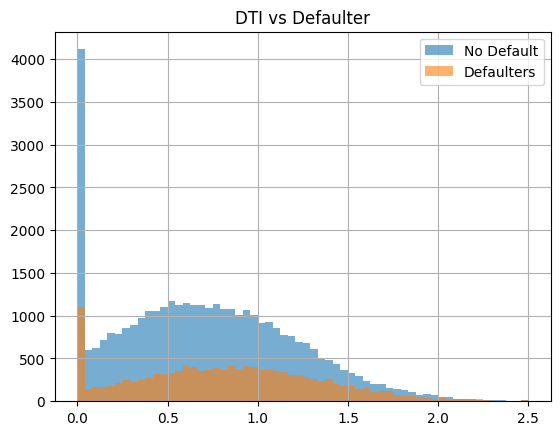

In [62]:
df[df.default == 0]['dti'].hist(alpha=0.6,bins=60,label='No Default')
df[df.default == 1]['dti'].hist(alpha=0.6,bins=60,label='Defaulters')
plt.legend()
plt.title("DTI vs Defaulter")
plt.show()

<Axes: xlabel='employment_type'>

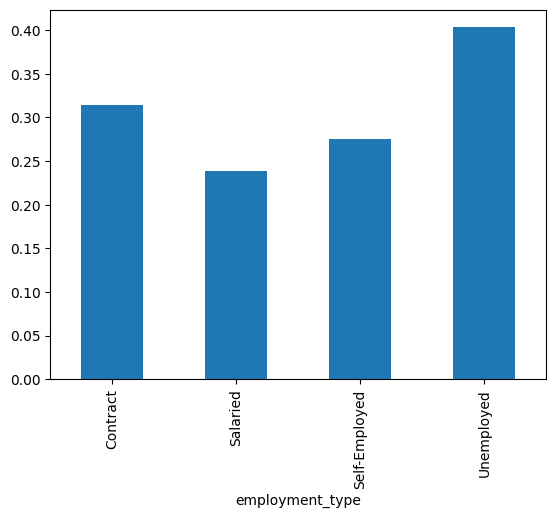

In [63]:
#Employment Type

df.groupby('employment_type')['default'].mean().plot(kind='bar')

In [64]:
df.head()

,age,annual_income,employment_type,city_tier,education,marital_status,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
0,25,200000.0,Contract,Tier-3,Graduate,Married,281280.667318,60,14.429230,768.0,6447.685358,81.287578,0.386861,1.406403,0
1,55,200000.0,Self-Employed,Tier-1,12th,Married,287920.711322,48,12.779348,632.0,9093.694365,87.708023,0.545622,1.439604,0
2,50,200000.0,Salaried,Tier-1,Graduate,Single,399631.681027,72,11.692436,754.0,9055.655375,88.029008,0.543339,1.998158,1
3,40,200000.0,Self-Employed,Tier-1,Graduate,Single,654321.638239,60,17.508472,628.0,16268.348836,128.222488,0.976101,3.271608,0
4,40,200000.0,Salaried,Tier-3,Postgraduate,Divorced,361899.398930,12,13.613364,730.0,22851.471551,180.078050,1.371088,1.809497,0


In [65]:
cat_cols

Index(['employment_type', 'city_tier', 'education', 'marital_status'], dtype='object')

In [66]:
# lbl.fit_transform(df[cat_cols]).toarray()

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
lbl = OneHotEncoder()

In [69]:
encoded = lbl.fit_transform(df[cat_cols]).toarray()

In [70]:
cat_cols

Index(['employment_type', 'city_tier', 'education', 'marital_status'], dtype='object')

In [71]:
columns = lbl.get_feature_names_out(cat_cols)

In [72]:
len(columns)

14

In [73]:
encoded.shape

(50000, 14)

In [74]:
len(columns)

14

In [75]:
df.shape[0]

50000

In [76]:
# df.drop('

In [77]:
# encoded_df = pd.DataFrame(
#     encoded,
#     columns
# )

In [78]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]], shape=(50000, 14))

In [79]:
encoded_df = pd.DataFrame(encoded,columns=columns)

In [80]:
encoded_df

,employment_type_Contract,employment_type_Salaried,employment_type_Self-Employed,employment_type_Unemployed,city_tier_Tier-1,city_tier_Tier-2,city_tier_Tier-3,education_10th,education_12th,education_Graduate,education_Postgraduate,marital_status_Divorced,marital_status_Married,marital_status_Single
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [81]:
df.drop(columns=cat_cols).reset_index(drop=True)

,age,annual_income,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,default
0,25,200000.0,281280.667318,60,14.429230,768.0,6447.685358,81.287578,0.386861,1.406403,0
1,55,200000.0,287920.711322,48,12.779348,632.0,9093.694365,87.708023,0.545622,1.439604,0
2,50,200000.0,399631.681027,72,11.692436,754.0,9055.655375,88.029008,0.543339,1.998158,1
3,40,200000.0,654321.638239,60,17.508472,628.0,16268.348836,128.222488,0.976101,3.271608,0
4,40,200000.0,361899.398930,12,13.613364,730.0,22851.471551,180.078050,1.371088,1.809497,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,45,200000.0,601959.403448,36,10.179887,725.0,3599.196047,139.550763,0.215952,3.009797,0
49996,65,200000.0,288042.769015,36,11.083371,698.0,9241.610106,97.167521,0.554497,1.440214,0
49997,28,200000.0,57682.873593,12,8.450176,709.0,21356.346290,70.920780,1.281381,0.288414,0
49998,34,200000.0,448486.980692,36,15.597136,758.0,3241.139973,125.213478,0.194468,2.242435,0


In [82]:
encoded_df.reset_index(drop=True)

,employment_type_Contract,employment_type_Salaried,employment_type_Self-Employed,employment_type_Unemployed,city_tier_Tier-1,city_tier_Tier-2,city_tier_Tier-3,education_10th,education_12th,education_Graduate,education_Postgraduate,marital_status_Divorced,marital_status_Married,marital_status_Single
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [83]:
df_final = pd.concat(
    [df.drop(columns=cat_cols).reset_index(drop=True), encoded_df.reset_index(drop=True)],
    axis=1
)

In [84]:
df_final

,age,annual_income,loan_amount,loan_term_months,interest_rate,credit_score,existing_emis,estimated_emi,dti,loan_to_income,...,city_tier_Tier-1,city_tier_Tier-2,city_tier_Tier-3,education_10th,education_12th,education_Graduate,education_Postgraduate,marital_status_Divorced,marital_status_Married,marital_status_Single
0,25,200000.0,281280.667318,60,14.429230,768.0,6447.685358,81.287578,0.386861,1.406403,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,55,200000.0,287920.711322,48,12.779348,632.0,9093.694365,87.708023,0.545622,1.439604,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,50,200000.0,399631.681027,72,11.692436,754.0,9055.655375,88.029008,0.543339,1.998158,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40,200000.0,654321.638239,60,17.508472,628.0,16268.348836,128.222488,0.976101,3.271608,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,40,200000.0,361899.398930,12,13.613364,730.0,22851.471551,180.078050,1.371088,1.809497,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45,200000.0,601959.403448,36,10.179887,725.0,3599.196047,139.550763,0.215952,3.009797,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49996,65,200000.0,288042.769015,36,11.083371,698.0,9241.610106,97.167521,0.554497,1.440214,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49997,28,200000.0,57682.873593,12,8.450176,709.0,21356.346290,70.920780,1.281381,0.288414,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49998,34,200000.0,448486.980692,36,15.597136,758.0,3241.139973,125.213478,0.194468,2.242435,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
df['employment_type'].value_counts()

employment_type
Salaried         31234
Self-Employed    12734
Contract          4512
Unemployed        1520
Name: count, dtype: int64

In [86]:
df['city_tier'].value_counts()

city_tier
Tier-2    20126
Tier-1    17440
Tier-3    12434
Name: count, dtype: int64

In [87]:
df['education'].value_counts()

education
Graduate        24108
12th            11000
Postgraduate     8945
10th             5947
Name: count, dtype: int64

In [88]:
df['marital_status'].value_counts()

marital_status
Married     24965
Single      22581
Divorced     2454
Name: count, dtype: int64

In [89]:
df[cat_cols]

,employment_type,city_tier,education,marital_status
0,Contract,Tier-3,Graduate,Married
1,Self-Employed,Tier-1,12th,Married
2,Salaried,Tier-1,Graduate,Single
3,Self-Employed,Tier-1,Graduate,Single
4,Salaried,Tier-3,Postgraduate,Divorced
...,...,...,...,...
49995,Salaried,Tier-2,Graduate,Married
49996,Self-Employed,Tier-2,Graduate,Married
49997,Self-Employed,Tier-2,Graduate,Single
49998,Salaried,Tier-1,Graduate,Married


In [90]:
df_final.shape

(50000, 25)

In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            50000 non-null  int64  
 1   annual_income                  50000 non-null  float64
 2   loan_amount                    50000 non-null  float64
 3   loan_term_months               50000 non-null  int64  
 4   interest_rate                  50000 non-null  float64
 5   credit_score                   50000 non-null  float64
 6   existing_emis                  50000 non-null  float64
 7   estimated_emi                  50000 non-null  float64
 8   dti                            50000 non-null  float64
 9   loan_to_income                 50000 non-null  float64
 10  default                        50000 non-null  int64  
 11  employment_type_Contract       50000 non-null  float64
 12  employment_type_Salaried       50000 non-null 